In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('C:\\Users\\LENOVO\\Titanic.xlsx')

In [3]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [34]:
df.head(60)

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
5,3,male,28.0,0
6,1,male,54.0,0
7,3,male,2.0,0
8,3,female,27.0,1
9,2,female,14.0,1


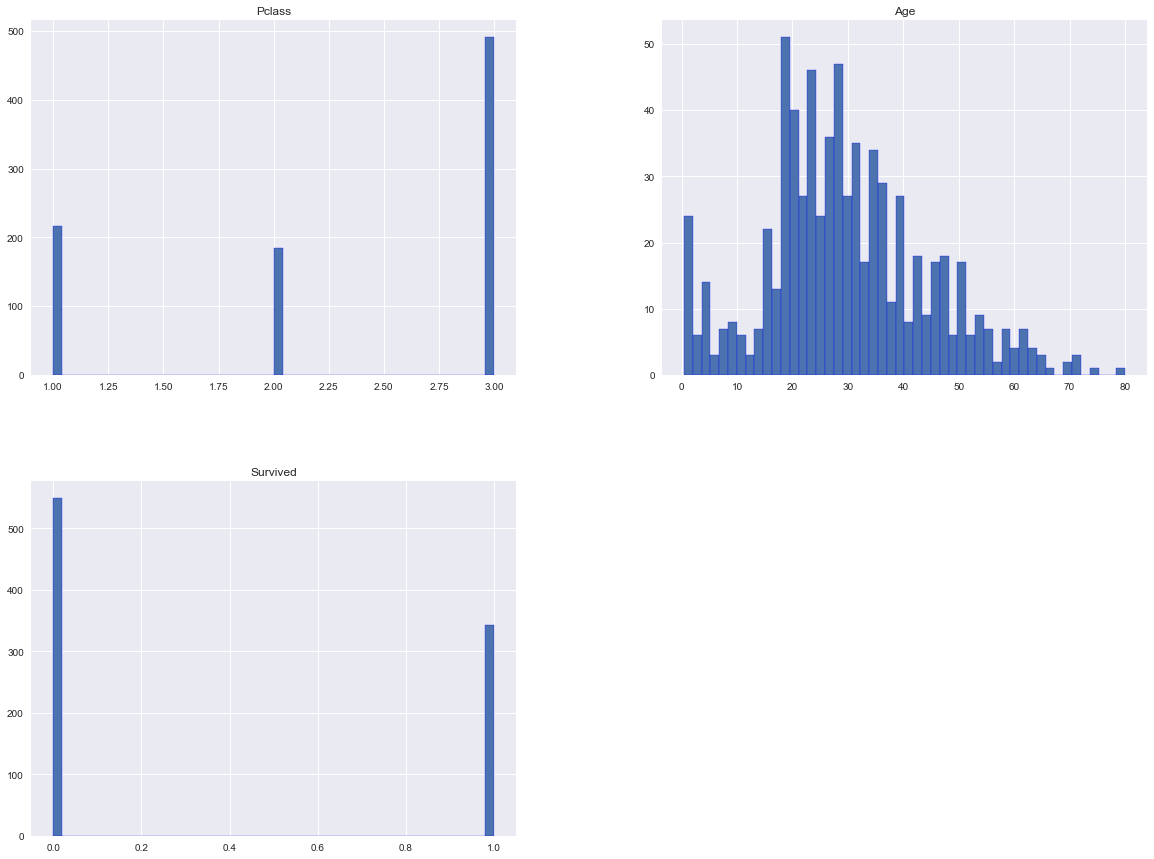

In [7]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

In [8]:
q=df['Age'].median()
df['Age'].fillna(q,inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17568\2021151754.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Age']> higher_fence].fillna(q,inplace=True)


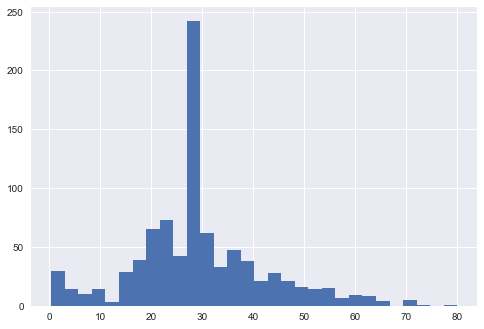

In [9]:
x=df['Age']
y=x.to_numpy()
z=np.sort(y)
Q1=np.percentile(z,25)
Q3=np.percentile(z,75)
IQR =Q3-Q1
lower_fence =Q1-(1.5*IQR)
higher_fence =Q3+(1.5*IQR)
df[df['Age']> higher_fence].fillna(q,inplace=True)
plt.hist(z,bins=30)
plt.show()

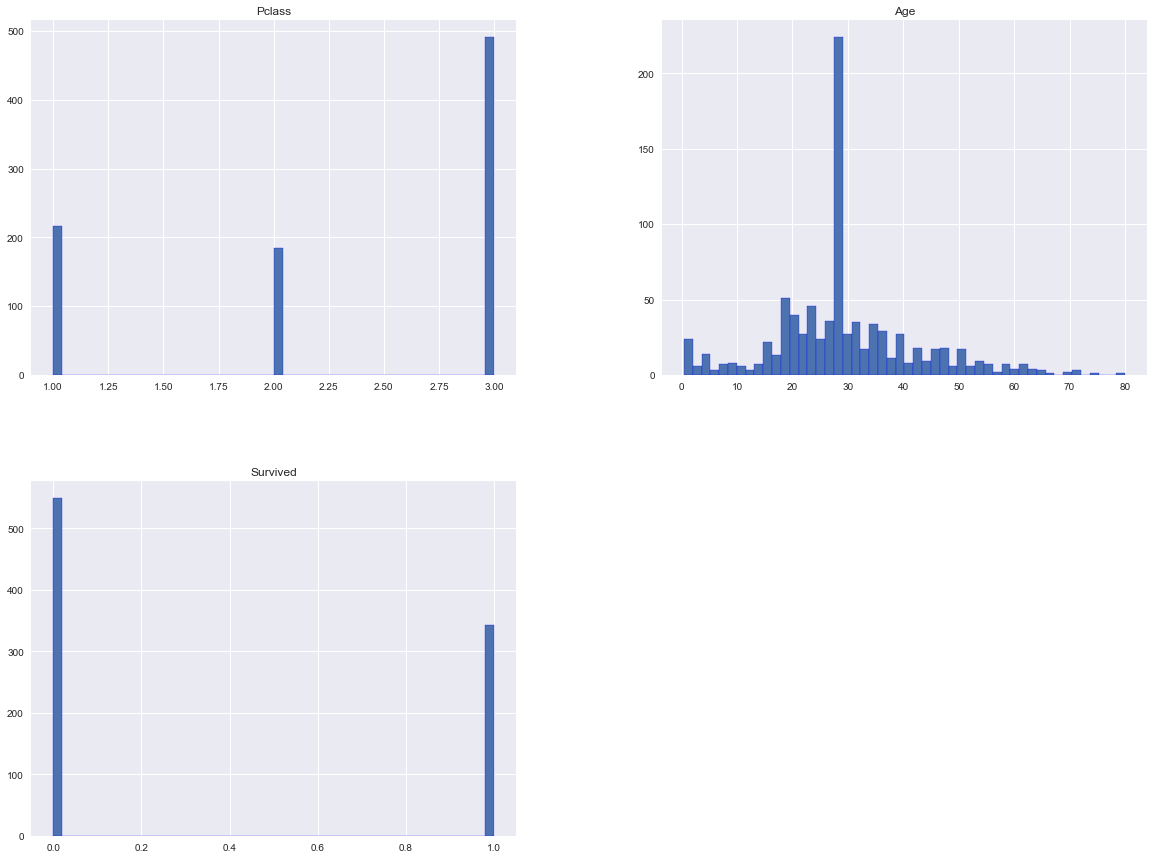

In [10]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

In [11]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

In [12]:
final =pd.get_dummies(data=df,columns=['Pclass','Sex'],drop_first=True)

In [13]:
final.head()

,Age,Survived,Pclass_2,Pclass_3,Sex_male
0,22.0,0,0,1,1
1,38.0,1,0,0,0
2,26.0,1,0,1,0
3,35.0,1,0,0,0
4,35.0,0,0,1,1


In [14]:
X=final.drop(['Survived'],axis=1)
x

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [15]:
y=final.Survived

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
X_train

,Age,Pclass_2,Pclass_3,Sex_male
331,45.5,0,0,1
733,23.0,1,0,1
382,32.0,0,1,1
704,26.0,0,1,1
813,6.0,0,1,0
...,...,...,...,...
106,21.0,0,1,0
270,28.0,0,0,1
860,41.0,0,1,1
435,14.0,0,0,0


In [19]:
from sklearn.naive_bayes import BernoulliNB

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model=BernoulliNB()

In [22]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8044692737430168

In [23]:
model.fit(X_train,y_train)

BernoulliNB()

In [24]:
model.score(X_test,y_test)

0.7821229050279329

In [25]:
y_test.shape

(179,)

In [26]:
X_test[:5]

,Age,Pclass_2,Pclass_3,Sex_male
709,28.0,0,1,1
439,31.0,1,0,1
840,20.0,0,1,1
720,6.0,1,0,0
39,14.0,0,1,0


In [27]:
y_pred=model.predict(X_test)

In [28]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
import seaborn as sns

In [31]:
cm=confusion_matrix(y_test,y_pred)

In [32]:
import matplotlib.pyplot as plt

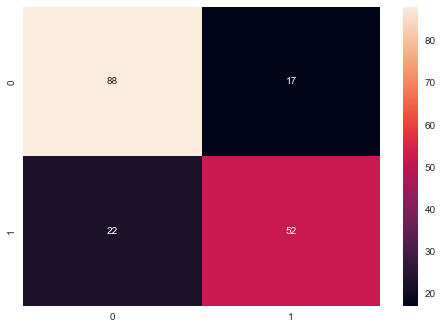

In [33]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [55]:
df1=pd.read_excel('C:\\Users\\LENOVO\\Titanic.xlsx')

In [56]:
df1.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [57]:
q=df1['Age'].median()
df1['Age'].fillna(q,inplace=True)
df1

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,28.0,0
889,1,male,26.0,1


In [58]:
df1=pd.get_dummies(data=df1,columns=['Sex'],drop_first=True)


In [94]:
df2=pd.read_excel('C:\\Users\\LENOVO\\Titanic.xlsx')

In [95]:
df2.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [96]:
q=df2['Age'].median()
df2['Age'].fillna(q,inplace=True)
df2

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,28.0,0
889,1,male,26.0,1


In [97]:
df2=pd.get_dummies(data=df2,columns=['Pclass','Sex'],drop_first=True)
df2

,Age,Survived,Pclass_2,Pclass_3,Sex_male
0,22.0,0,0,1,1
1,38.0,1,0,0,0
2,26.0,1,0,1,0
3,35.0,1,0,0,0
4,35.0,0,0,1,1
...,...,...,...,...,...
886,27.0,0,1,0,1
887,19.0,1,0,0,0
888,28.0,0,0,1,0
889,26.0,1,0,0,1


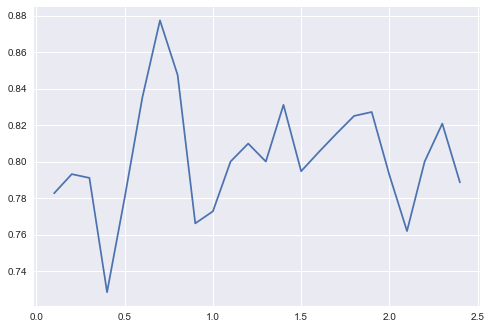

In [98]:
from sklearn.preprocessing import StandardScaler
score_list1 =[]
score_list2 =[]


def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.1,2.5,0.1):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby(['Sex_male']):
            m= np.mean(subdf.Age)
            s=np.std(subdf.Age)
            reduced_df =subdf[(subdf.Age>(m-i*s))&(subdf.Age<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df2)
    X=df4.drop(['Survived'],axis=1)
    y=df4.Survived
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    reg.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(reg.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   


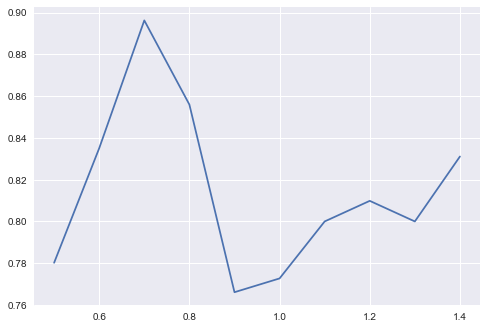

In [99]:
from sklearn.preprocessing import StandardScaler
score_list1 =[]
score_list2 =[]


def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.5,1.5,0.1):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby(['Sex_male']):
            m= np.mean(subdf.Age)
            s=np.std(subdf.Age)
            reduced_df =subdf[(subdf.Age>(m-i*s))&(subdf.Age<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df2)
    X=df4.drop(['Survived'],axis=1)
    y=df4.Survived
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(model.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   


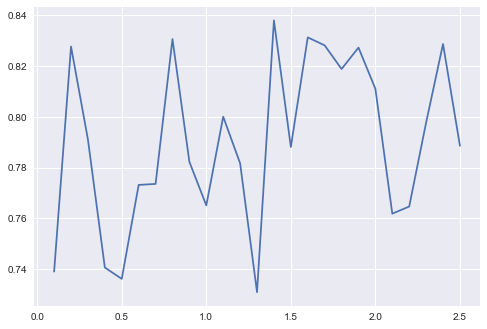

In [100]:
from sklearn.preprocessing import StandardScaler
score_list1 =[]
score_list2 =[]
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()


def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.1,2.6,0.1):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby(['Sex_male']):
            m= np.mean(subdf.Age)
            s=np.std(subdf.Age)
            reduced_df =subdf[(subdf.Age>(m-i*s))&(subdf.Age<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df2)
    X=df4.drop(['Survived'],axis=1)
    y=df4.Survived
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    decision.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(decision.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   


In [101]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for keys,subdf in df.groupby(['Sex_male']):
        m= np.mean(subdf.Age)
        s=np.std(subdf.Age)
        reduced_df =subdf[(subdf.Age>(m-0.7*s))&(subdf.Age<(m+0.7*s))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out
df4 = remove_pps_outliers(df2)
X=df4.drop(['Survived'],axis=1)
y=df4.Survived

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model.fit(X_train,y_train)

BernoulliNB()

In [103]:
model.score(X_test,y_test)

0.8962264150943396

In [104]:
y_pred=model.predict(X_test)

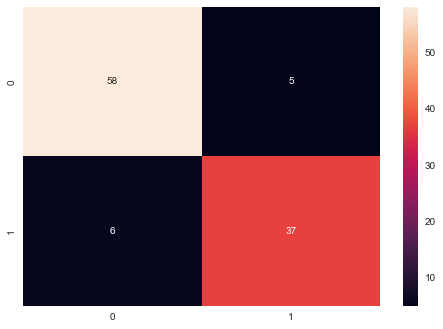

In [105]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True)
plt.show()

In [106]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.88      0.86      0.87        43

    accuracy                           0.90       106
   macro avg       0.89      0.89      0.89       106
weighted avg       0.90      0.90      0.90       106



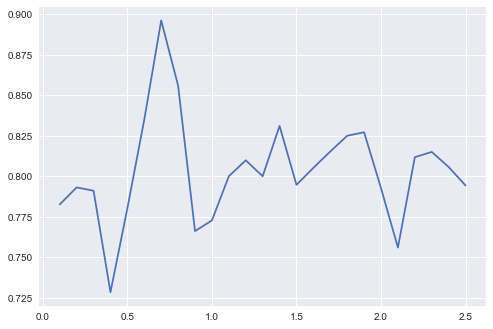

In [109]:
from sklearn.preprocessing import StandardScaler
score_list1 =[]
score_list2 =[]
from sklearn.preprocessing import MinMaxScaler

def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.1,2.6,0.1):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby(['Sex_male']):
            m= np.mean(subdf.Age)
            s=np.std(subdf.Age)
            reduced_df =subdf[(subdf.Age>(m-i*s))&(subdf.Age<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df2)
    X=df4.drop(['Survived'],axis=1)
    y=df4.Survived
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.20, random_state=42)
    model.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(model.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   


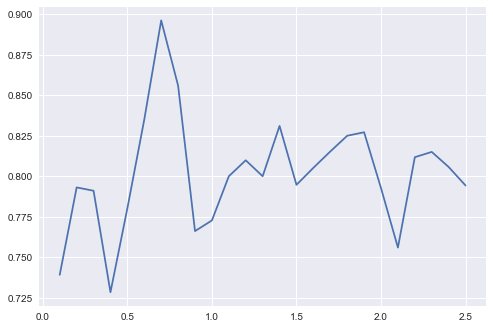

In [110]:
from sklearn.preprocessing import StandardScaler
score_list1 =[]
score_list2 =[]
from sklearn.preprocessing import MinMaxScaler

def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.1,2.6,0.1):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby(['Sex_male']):
            m= np.mean(subdf.Age)
            s=np.std(subdf.Age)
            reduced_df =subdf[(subdf.Age>(m-i*s))&(subdf.Age<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df2)
    X=df4.drop(['Survived'],axis=1)
    y=df4.Survived
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.20, random_state=42)
    model.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(model.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   
